In [1]:
%load_ext autoreload
%autoreload 2
from utils.arima_utils import *
from utils.helper import *
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
from utils import pipe_def_arima

In [3]:
root = '/Users/cthorey/Documents/project/competition/fognet/models/ray/arima/'

# TODO LIST

## TO-DO
2. Implement random sampling feature space

5. TODO VARMAX model avec micro data et x exodata

## DONE

3. Recursive FIT EM-like estiamtion - improve the score a tiny bit !

4. TODO DOES SARIMAX perform the same if we input the nan with time interpolation ?

    - **Rapport**

        - Significant improvement in the performance when we use time interpolation for yield
        - We implement it in the pipeline as a yield arg !
        
3. Try only with ARIMA, pas SARIMAX
    - ** Rapport **
        - Ne fonctionne pas car n'a pas de possibilite de faire de la bonne forecast. mod.filter pas implementer !
        
6. Essayer d'enlever le Standard scaler
    - ** Rapport **
        - Ca ne change rien
        
2. Implement avec PCA en premier pour voir si ca a de l'effet
    - ** Rapport **
        - Oui ca a de l'effet, implementer !

# micro data

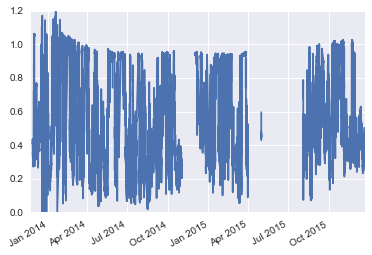

In [582]:
data['microclimat_train_5m'].humidity.plot()

# Pipeline fit best arima 

In [382]:
import math, datetime
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as robj
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
import uuid
from rpy2.robjects.packages import importr 
from IPython.core.display import Image
rprint = robj.globalenv.get("print")

In [558]:
from utils.preprocessing import *

In [583]:
config = parse_conf_file(os.path.join(root,'model_5','conf_model.json'))
config

{u'AR': 0,
 u'D': 1,
 u'MA': 1,
 u'Season_AR': 0,
 u'Season_D': 0,
 u'Season_MA': 0,
 u'Season_Period': 0,
 u'access_token_oscar': u'bv46kOZd1WwBFo33lzTZjFTKKUOTGgA6RwlZQ6CWag9zfnNlbnNvdXQtb3NjYXJyEQsSBFVzZXIYgICAgN7PjQoM',
 u'continue_training': False,
 u'description': u'Explore the parameters of the distribution. What is the best combination for the order parametersof the ARIMAX. Data micro- missing values input with auto.arima function ',
 u'experiment_name': u'ARIMAX/model_4/ray-micro-autoarima',
 u'nb_cpus': 2,
 u'overwrite': True,
 u'parameters_def': {u'AR': {u'max': 8, u'min': 0, u'step': 1},
  u'D': [0, 1, 2],
  u'MA': {u'max': 8, u'min': 0, u'step': 1}},
 u'parameters_grid': {u'AR': [0, 1, 2],
  u'D': [0, 1],
  u'MA': [0, 1, 2],
  u'Season_AR': [0, 1, 2],
  u'Season_D': [0, 1],
  u'Season_MA': [0, 1, 2],
  u'Season_Period': [1, 2]},
 u'pca_components': 0,
 u'pipe': {u'pipe_kwargs': {u'part1': {u'FeatureSelector__features': [u'humidity',
     u'temp']},
   u'part2': {u'FeatureS

In [584]:
mod = ArimaModel(config)
mod.AR=6
mod.D=0
mod.MA =8
mod.init_model()

Loading the prepro pipeline
Order : 
(0, 1, 1)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Order : 
(6, 0, 8)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints


In [585]:
mod.train()

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


/Users/cthorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/cthorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/cthorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 1.728
    aic : 5976.571
    bic : 6101.169
    hqic : 6022.667
test summary:
    rmse : 1.006
    aic : 1755.059
    bic : 1854.400
    hqic : 1793.754
Will write output to ~/Documents/project/competition/fognet/models/ray/arima/model_5/AR_0_MA_1_D_1/submissions_20160410_215421.csv


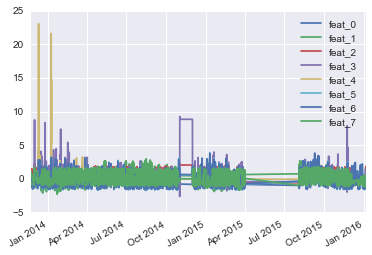

In [579]:
mod.df[mod.regressors].plot()

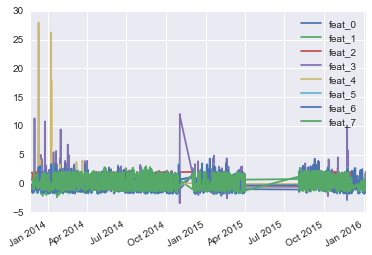

In [577]:
mod.df[mod.regressors].plot()

In [567]:
mod.train()

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 1.747
    aic : 6000.443
    bic : 6054.616
    hqic : 6020.484
test summary:
    rmse : 0.859
    aic : 1650.566
    bic : 1693.758
    hqic : 1667.390
Will write output to ~/Documents/project/competition/fognet/models/ray/arima/model_5/AR_0_MA_1_D_1/submissions_20160410_214420.csv


In [564]:
mod.train()

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 2.061
    aic : 6378.332
    bic : 6432.505
    hqic : 6398.373
test summary:
    rmse : 0.998
    aic : 1731.552
    bic : 1774.743
    hqic : 1748.376
Will write output to ~/Documents/project/competition/fognet/models/ray/arima/model_5/AR_0_MA_1_D_1/submissions_20160410_214337.csv


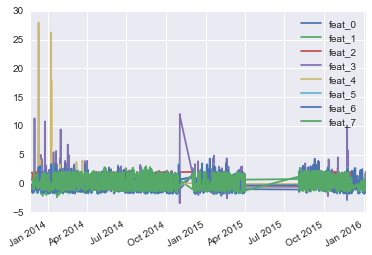

In [524]:
mod.df[mod.regressors].plot()

In [525]:
from utils.pipe_def_arima import pipe_maia_V2

In [528]:
df = add_group_column_to_data(build_dataset())
pipe = build_entire_pipeline(pipe_maia_V2['pipe_list'],pipe_maia_V2['pipe_kwargs'],df)


In [ ]:
fit_best_ARIMA

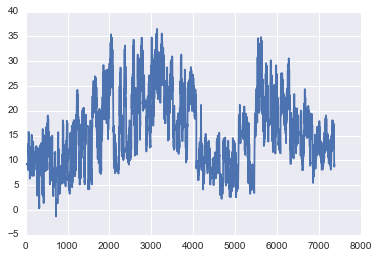

In [467]:
plt.plot(fit_best_ARIMA(mod.df.temp.replace(0,np.nan)))

In [468]:
data = load_raw_data()

In [472]:
data['micro_feats']

{'gusts_ms': ' A measure of the highest gust during the reporting interval',
 'humidity': ' A measure of the humidity in the air',
 'leafwet450_min': ' Leaf wetness (a measure of the presence of dew) sensor 1',
 'leafwet460_min': ' Leaf wetness (a measure of the presence of dew) sensor 2',
 'leafwet_lwscnt': ' Leaf wetness (a measure of the presence of dew) sensor 3',
 'percip_mm': ' Perciptitation (mm)',
 'temp': ' The temperature',
 'wind_dir': ' The dominant direction the wind is blowing in',
 'wind_ms': ' A measure of the current wind speed'}

- gust_ms : on garde
- humidity : remove water == zero
- temp : idem
- 


In [507]:
a = np.zeros((2,2))

In [498]:
def plot_feat(feat):
    fig = plt.figure(figsize=(20,10))
    ax = plt.subplot(211)
    mod.df[feat].plot(ax=ax,marker='o')
    ax = plt.subplot(212)
    df = pd.DataFrame(fit_best_ARIMA(mod.df[feat]).T,index=mod.df.index)
    df.plot(ax=ax,marker='o')

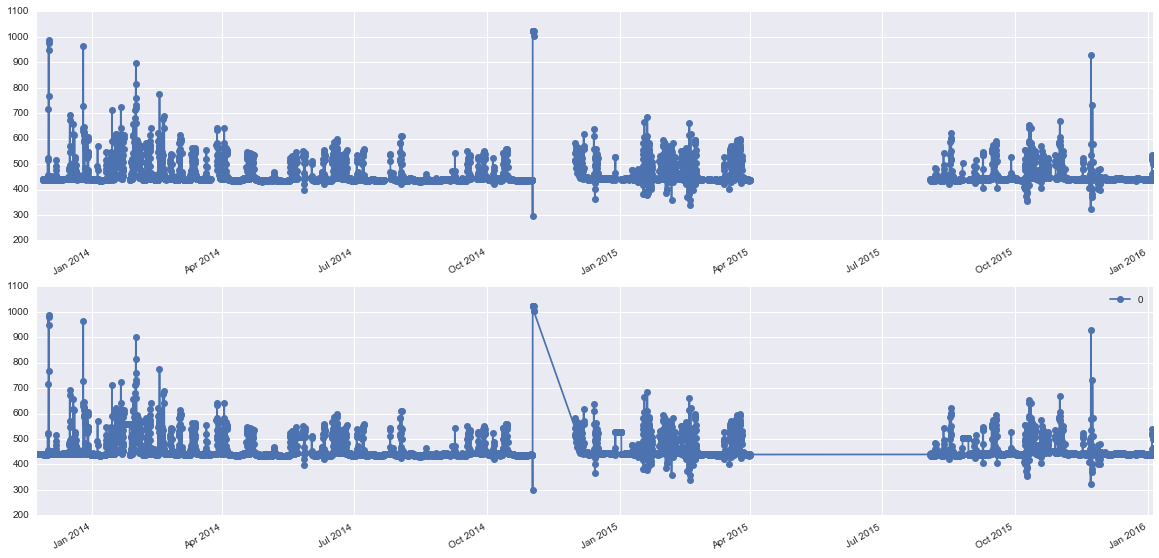

In [512]:
plot_feat('leafwet_lwscnt')

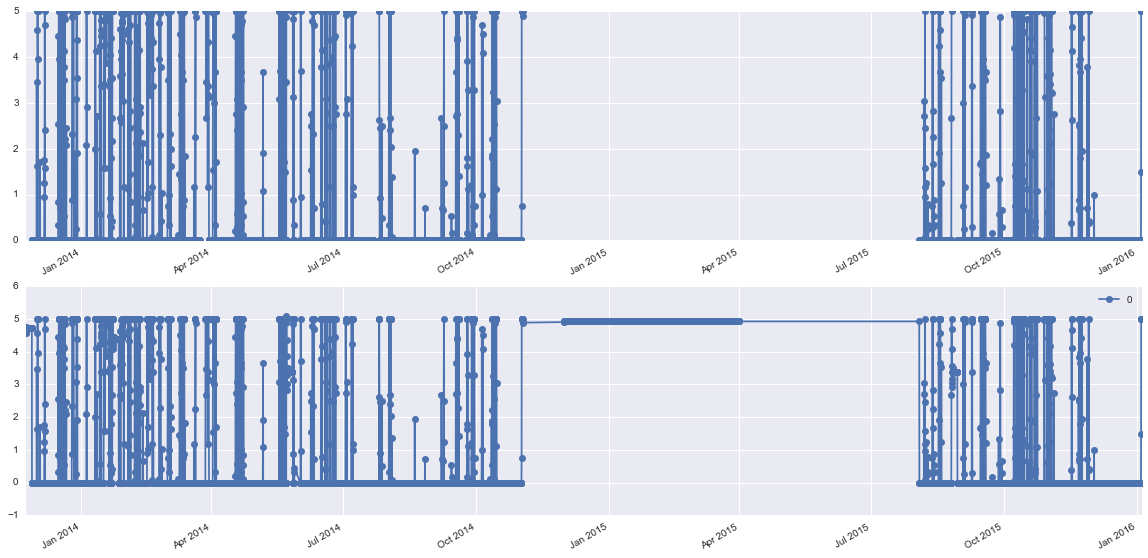

In [520]:
plot_feat('')

In [493]:
mod.df['temp'].min()

0.0

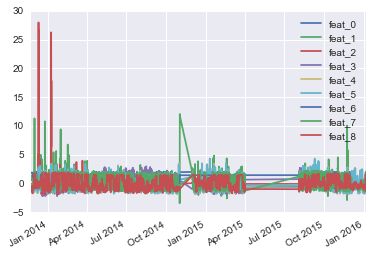

In [427]:
mod.df[mod.regressors].plot()

In [436]:
mod.df[mod.regressors+['feat_yield']].shape

(7377, 10)

In [443]:
np.array(mod.df[mod.regressors+['feat_yield']]).shape

(7377, 10)

In [447]:
model = sm.tsa.VARMAX(endog=np.array(mod.df[mod.regressors]))
res = model.fit()

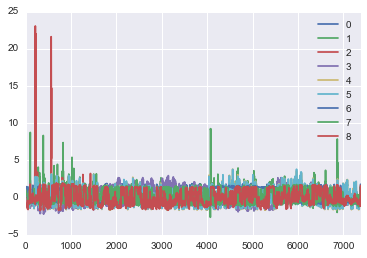

In [449]:
pd.DataFrame(res.fittedvalues).plot()

In [450]:
mod.df[['humidiy','temp']]

KeyError: "['humidiy'] not in index"

In [446]:
model.predict

In [417]:
mod.train()

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
train summary:
    rmse : 4.151
    aic : 6139.644
    bic : 6199.234
    hqic : 6161.690
test summary:
    rmse : 5.537
    aic : 1672.402
    bic : 1719.913
    hqic : 1690.909
Will write output to ~/Documents/project/competition/fognet/models/ray/arima/model_4/AR_0_MA_1_D_1/submissions_20160410_184510.csv


In [395]:
from utils.preprocessing import *

In [399]:
a = AutoArimaInputer()
arr = a.fit_transform(b.df[['humidity','temp']])

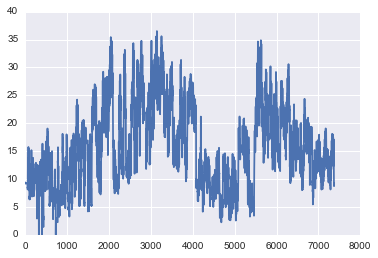

In [401]:
plt.plot(arr[:,1])

In [402]:
from utils.pipe_def_arima import *

In [405]:
pipe = build_entire_pipeline(pipe_maia['pipe_list'],pipe_maia['pipe_kwargs'],b.df)

In [406]:
pipe.fit_transform(b.df)

ValueError: columns overlap but no suffix specified: Index([u'feat_0', u'feat_1', u'feat_2', u'feat_3', u'feat_4', u'feat_5',
       u'feat_6', u'feat_7', u'feat_8'],
      dtype='object')

In [340]:
rforecast = importr('forecast')

In [464]:
def fit_best_ARIMA(x):
    robj.globalenv['x'] = x
    robj.r('y<-x')
    robj.r('fit <- auto.arima(x)')
    robj.r('kr <- KalmanRun(x, fit$model)')
    robj.r('id.na <- which(is.na(x))') 
    robj.r('for (i in id.na) y[i] <- fit$model$Z %*% kr$states[i,]')
    return rpyn.ri2py(robj.r['y'])

In [371]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [373]:
type(fit_best_ARIMA(b.df.humidity))

rpy2.robjects.vectors.FloatVector

In [366]:
b.df.humidity.shape

(7377,)

# Make ensemble 

In [286]:
from utils.ensemble_utils import *
from utils.result_utils import *
from utils.arima_utils import *

In [287]:
root

'/Users/cthorey/Documents/project/competition/fognet/models/ray/arima/'

In [288]:
from utils.pipe_def_arima import pipe_yield_base

In [289]:
pipe_yield_base

{'pipe_kwargs': {'yield': {'FeatureSelector__features': ['yield']}},
 'pipe_list': {'yield': ['FeatureSelector']}}

In [545]:
parameters = {'AR': range(3),
                           'D': [0, 1],
                           'MA': range(3),
                           'Season_AR': range(3),
                           'Season_D': [0, 1],
                           'Season_MA': range(3),
                           'Season_Period': [1, 2]}.keys()
dfmodels = get_result_arima(os.path.join(root,'model_2'),hp=parameters)
dfmodels.head()

,root,model,MA,D,Season_Period,AR,Season_MA,Season_D,Season_AR,test_aic,test_bic,test_rmse,train_bic,train_aic,train_hqic,test_hqic,train_rmse
0,/Users/cthorey/Documents/project/competition/f...,AR_1_MA_0_D_0,0,0,0,1,0,0,0,1637.933362,1685.444290,0.836506,6038.453660,5978.863042,6000.908909,1656.439856,1.731224
1,/Users/cthorey/Documents/project/competition/f...,AR_1_MA_5_D_0,5,0,0,1,0,0,0,1623.487924,1692.594728,0.845630,6016.071459,5929.394195,5961.460912,1650.406460,1.719181
2,/Users/cthorey/Documents/project/competition/f...,AR_2_MA_0_D_0,0,0,0,2,0,0,0,1643.048448,1694.878550,0.845681,6039.664782,5974.656834,5998.706871,1663.237350,1.727697
3,/Users/cthorey/Documents/project/competition/f...,AR_2_MA_2_D_0,2,0,0,2,0,0,0,1630.061450,1690.529903,0.845809,6009.873527,5934.030921,5962.089298,1653.615169,1.719405
4,/Users/cthorey/Documents/project/competition/f...,AR_1_MA_2_D_0,2,0,0,1,0,0,0,1639.053544,1695.202821,0.846992,6035.737561,5965.312284,5991.366491,1660.924854,1.725768


In [424]:
sm.tsa.VARMAX?

In [292]:
b = ArimaModel(config)

Loading the prepro pipeline
Order : 
(0, 1, 1)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints


In [327]:
b.df.columns

Index([u'feat_yield', u'feat_0', u'feat_1', u'feat_2', u'feat_3', u'feat_4',
       u'feat_5', u'feat_6', u'feat_7', u'feat_8', u'feat_9', u'feat_10',
       u'feat_11', u'feat_12', u'feat_13', u'feat_14', u'feat_15', u'feat_16',
       u'feat_17', u'feat_18', u'feat_19', u'feat_20', u'feat_21', u'feat_22',
       u'feat_23', u'feat_24', u'feat_25', u'feat_26', u'feat_27', u'feat_28',
       u'feat_29', u'feat_30', u'feat_31', u'feat_32', u'feat_33', u'feat_34',
       u'feat_35', u'gusts_ms', u'humidity', u'leafwet450_min',
       u'leafwet460_min', u'leafwet_lwscnt', u'percip_mm', u'temp', u'type',
       u'wind_dir', u'wind_ms', u'yield', u'guel_T', u'guel_P0', u'guel_P',
       u'guel_U', u'guel_DD', u'guel_Ff', u'guel_ff10', u'guel_WW',
       u'guel_W'W'', u'guel_c', u'guel_VV', u'guel_Td', u'sidi_T', u'sidi_Po',
       u'sidi_P', u'sidi_Pa', u'sidi_U', u'sidi_Ff', u'sidi_Tn', u'sidi_Tx',
       u'sidi_VV', u'sidi_Td', u'sidi_tR', u'sidi_Tg', u'sidi_sss', u'aga_T',
       u'aga_P

In [325]:
mod = sm.tsa.SARIMAX(endog = b.df.temp,order=(1,1,6),measurement_error=True)
res = mod.fit()

/Users/cthorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


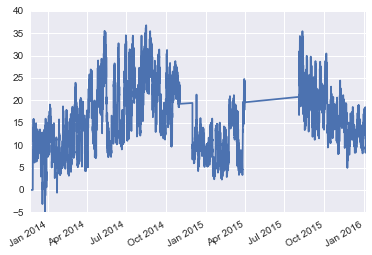

In [326]:
res.fittedvalues.plot()

In [310]:
d = b.df.humidity.interpolate(method='time').bfill()

In [312]:
mean_squared_error(d.values,res.fittedvalues.values)

0.010778770679869798

In [421]:
ensemble = get_best_ensemble(dfmodels,nb_models_init=3)

--- 31.5068690777 seconds ---


RMSE train split = 1.881
RMSE test split = 1.229


RMSE train split = 1.881
RMSE test split = 1.229


RMSE train split = 1.866
RMSE test split = 1.202


2.0


--- 20.6020011902 seconds ---


RMSE train split = 1.866
RMSE test split = 1.202


In [422]:
ensemble.make_submission()

Will write output to /Users/cthorey/Documents/project/competition/fognet/models/ray/arima/model_4/ensemble/submissions_20160410_190444.csv


In [ ]:
0679918115

In [243]:
a = EnsembleArima(dfmodels,nb_models=2)

--- 12.7613987923 seconds ---


In [251]:
ensemble = get_best_ensemble(dfmodels,nb_models_init=10)

--- 71.7599449158 seconds ---


RMSE train split = 2.394
RMSE test split = 1.049


RMSE train split = 2.394
RMSE test split = 1.049


RMSE train split = 2.502
RMSE test split = 1.051


RMSE train split = 2.654
RMSE test split = 1.053


RMSE train split = 1.923
RMSE test split = 1.035


RMSE train split = 1.935
RMSE test split = 1.034


RMSE train split = 1.933
RMSE test split = 1.033


RMSE train split = 1.934
RMSE test split = 1.034


RMSE train split = 1.937
RMSE test split = 1.035


RMSE train split = 1.945
RMSE test split = 1.046


5.0


--- 38.1328208447 seconds ---


RMSE train split = 1.933
RMSE test split = 1.033


In [255]:
ensemble.make_submission()

Will write output to /Users/cthorey/Documents/project/competition/fognet/models/ray/arima/model_1/ensemble/submissions_20160409_152355.csv


In [258]:
a = pd.read_csv('/Users/cthorey/Documents/project/competition/fognet/models/ray/arima/model_1/ensemble/submissions_20160409_152355.csv',index_col=0)

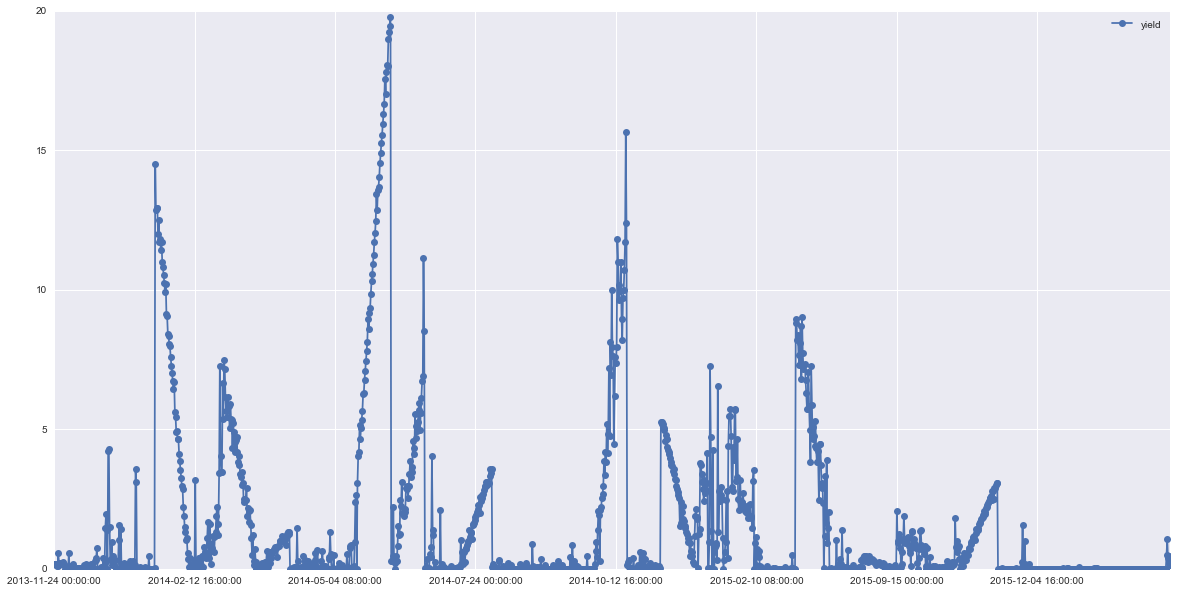

In [262]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
a.plot(marker='o',ax=ax)

In [237]:
np.argmin(np.array(a)[:,1])

1

In [226]:
ensemble.rmse_train

1.9454666658769688

In [225]:
for i in range(len(ensemble.ensemble)):
    ensemble.get_score()
    ensemble.ensemble.pop()

RMSE train split = 2.394
RMSE test split = 1.049


RMSE train split = 2.502
RMSE test split = 1.051


RMSE train split = 2.654
RMSE test split = 1.053


RMSE train split = 1.923
RMSE test split = 1.035


RMSE train split = 1.935
RMSE test split = 1.034


RMSE train split = 1.933
RMSE test split = 1.033


RMSE train split = 1.934
RMSE test split = 1.034


RMSE train split = 1.937
RMSE test split = 1.035


RMSE train split = 1.945
RMSE test split = 1.046


/Users/cthorey/miniconda2/envs/fognet/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [220]:
ensemble.get_score()

RMSE train split = 2.394
RMSE test split = 1.049


In [204]:
ensemble.get_score()

RMSE train split = 2.003
RMSE test split = 1.041


In [213]:
for i in range(len(ens.ensemble)):
    try:
        ens.get_score()
        ens.ensemble = ens.ensemble.pop()
    except:
        pass
    

RMSE train split = 2.003
RMSE test split = 1.041


In [211]:
ensemble.get_score()

RMSE train split = 2.003
RMSE test split = 1.041


In [212]:
ens = ensemble

# Implement random sampling feature space

In [75]:
from utils.arima_utils import *
config = parse_conf_file(os.path.join(root,'model_0','conf_model.json'))
model = ArimaModel(config=config)
model.AR = 0
model.D = 1
model.MA = 0
model.pca_components = 10
model.init_data()
model.init_model()

{'AR': 0, 'MA': 1, 'D': 1}
Loading the prepro pipeline
Set up the checkpoints
Loading the prepro pipeline
Set up the checkpoints


In [76]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
train summary:
    rmse : 100000.000
    aic : 100000.000
    bic : 100000.000
    hqic : 100000.000
test summary:
    rmse : 2.000
    aic : 2.000
    bic : 2.000
    hqic : 2.000


In [74]:
train,test = train_test_split(df)
mod2=sm.tsa.SARIMAX(endog = train['feat_yield'],
                    exog = train[model.regressors],
                    order = (0,1,0),
                    enforce_stationarity = False,
                    enforce_invertibility = False)

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


ValueError: could not broadcast input array from shape (0,0) into shape (1,1)

In [70]:
model.verbose = 2
df = model.df
df = df.groupby('group').get_group('group1')
model.fit_group(df)

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


ValueError: could not broadcast input array from shape (0,0) into shape (1,1)

In [11]:
model.Season_AR

0

In [4]:
df = model.df
df0 = df.groupby('group').get_group('group0')
train,test = train_test_split(df0)

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


In [ ]:
{u'Season_RA': 3, u'D': 1, u'Season_Period': 1, u'AR': 2, u'Season_MA': 1, u'Season_D': 1, u'MA': 3}

In [71]:
mod2=sm.tsa.SARIMAX(endog = train['feat_yield'],
                    exog = train[model.regressors],
                    order = (0,1,0),
                    seasonal_order = (3,1,1,1),
                    enforce_stationarity = False,
                    enforce_invertibility = False)

KeyError: "['feat_9'] not in index"

In [21]:
res = mod2.fit()

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [22]:
print(res.summary())

                                 Statespace Model Results                                
Dep. Variable:                        feat_yield   No. Observations:                 3058
Model:             SARIMAX(2, 1, 3)x(3, 1, 1, 1)   Log Likelihood               -6412.596
Date:                           Thu, 07 Apr 2016   AIC                          12863.193
Time:                                   14:47:02   BIC                          12977.678
Sample:                               11-23-2013   HQIC                         12904.333
                                    - 08-09-2014                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.0984      0.141     -0.696      0.487      -0.376       0.179
feat_1         1.2180      0.033     37.375

In [469]:
sm.tsa.SARIMAX?

In [437]:
sm.tsa.SARIMAX?

In [435]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 3058
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -6608.933
Date:                Thu, 07 Apr 2016   AIC                          13239.866
Time:                        14:03:30   BIC                          13306.147
Sample:                    11-23-2013   HQIC                         13263.684
                         - 08-09-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.1855      0.143     -1.299      0.194      -0.465       0.094
feat_1         1.2447     

 33%|███▎      | 1/3 [00:03<00:06,  3.33s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 1089
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2295.060
Date:                Thu, 07 Apr 2016   AIC                           4612.120
Time:                        14:03:33   BIC                           4667.044
Sample:                    12-01-2014   HQIC                          4632.908
                         - 03-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.0057      0.134     -0.043      0.966      -0.269       0.257
feat_1         1.6478      

 67%|██████▋   | 2/3 [00:05<00:03,  3.09s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 1385
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2093.254
Date:                Thu, 07 Apr 2016   AIC                           4208.508
Time:                        14:03:35   BIC                           4266.076
Sample:                    08-03-2015   HQIC                          4230.040
                         - 11-26-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0        -0.2556      0.112     -2.278      0.023      -0.475      -0.036
feat_1         0.5697      

Will write output to ~/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/submissions_20160407_140336.csv
train summary:
    rmse : 1.898
    aic : 7353.498
    bic : 7413.089
    hqic : 7375.544
test summary:
    rmse : 0.919
    aic : 2019.872
    bic : 2067.383
    hqic : 2038.379


# Implement avec PCA en premier pour voir si ca a de l'effet

In [355]:
from utils.arima_utils import *
config = parse_conf_file(os.path.join(root,'model_2','conf_model.json'))
model = ArimaModel(config=config)

{'AR': 0, 'MA': 1, 'D': 1}
Loading the prepro pipeline
Set up the checkpoints


In [356]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 3058
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -6724.266
Date:                Thu, 07 Apr 2016   AIC                          13458.532
Time:                        12:20:28   BIC                          13488.659
Sample:                    11-23-2013   HQIC                         13469.358
                         - 08-09-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0         1.5226      0.037     40.638      0.000       1.449       1.596
feat_1        -0.1615     

 33%|███▎      | 1/3 [00:02<00:04,  2.32s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 1089
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2340.729
Date:                Thu, 07 Apr 2016   AIC                           4691.459
Time:                        12:20:29   BIC                           4716.424
Sample:                    12-01-2014   HQIC                          4700.908
                         - 03-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0         1.5673      0.075     20.774      0.000       1.419       1.715
feat_1        -0.2732      

 67%|██████▋   | 2/3 [00:03<00:01,  1.90s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation
                           Statespace Model Results                           
Dep. Variable:             feat_yield   No. Observations:                 1385
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2141.517
Date:                Thu, 07 Apr 2016   AIC                           4293.035
Time:                        12:20:30   BIC                           4319.202
Sample:                    08-03-2015   HQIC                          4302.822
                         - 11-26-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feat_0         0.4765      0.035     13.640      0.000       0.408       0.545
feat_1        -0.1429      

Will write output to ~/Documents/project/competition/fognet/models/bbking/arima/model_2/AR_0_MA_1_D_1/submissions_20160407_122031.csv
train summary:
    rmse : 1.989
    aic : 7481.008
    bic : 7508.095
    hqic : 7491.029
test summary:
    rmse : 0.949
    aic : 2037.312
    bic : 2058.908
    hqic : 2045.724


In [ ]:
train summary:
    rmse : 1.964
    aic : 7434.571
    bic : 7477.910
    hqic : 7450.604
test summary:
    rmse : 0.998
    aic : 2039.104
    bic : 2073.657
    hqic : 2052.563

#  Try only with ARIMA, pas SARIMAX

**Rapport**


In [427]:
from utils.arima_utils import *
config = parse_conf_file(os.path.join(root,'model_0','conf_model.json'))
model = ArimaModel(config=config)
model.AR = 5
model.init_model()

{'AR': 0, 'MA': 1, 'D': 1}
Loading the prepro pipeline
Set up the checkpoints
Set up the checkpoints


In [428]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation
                             ARIMA Model Results                              
Dep. Variable:           D.feat_yield   No. Observations:                 3057
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -6836.561
Method:                       css-mle   S.D. of innovations              2.264
Date:                Thu, 07 Apr 2016   AIC                          13707.121
Time:                        13:59:55   BIC                          13809.550
Sample:                    11-23-2013   HQIC                         13743.929
                         - 08-09-2014                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0837      0.032      2.587      0.010       0.020       0.147
fe

AttributeError: 'ARIMA' object has no attribute 'filter'

In [429]:
model.which_architecture = 'ARIMA'

In [430]:
model.init_model()

Set up the checkpoints


In [433]:
sm.tsa.SARIMAX?

In [431]:
m = sm.tsa.ARIMA(endog = model.df['feat_yield'],
            exog = model.df[model.regressors],
            order = model.order)

In [432]:
m.filter(res.params)

AttributeError: 'ARIMA' object has no attribute 'filter'

In [190]:
df.join?

In [182]:
len(res.fittedvalues),len(model.df)

(7377, 7377)

# Does SARIMAX perform the same if we input the nan with time interpolation

**Rapport**

- Significant improvement in the performance when we use time interpolation for yield
- We implement it in the pipeline as a yield arg !

In [154]:
from utils.arima_utils import *

In [159]:
# On prend le meilleur model pour l'instant
config = parse_conf_file(os.path.join(root,'model_0','conf_model.json'))
model = ArimaModel(config=config)
model.verbose = 0
model.Season_AR = 1
model.Season_Period = 0
model.AR = 3
model.Season_MA =0
model.MA = 1

model.init_model()

{'AR': 0, 'MA': 1, 'D': 1}
Loading the prepro pipeline
Set up the checkpoints
Set up the checkpoints


In [160]:
model.seasonal_order

(1, 0, 0, 0)

In [161]:
model.fit()

  0%|          | 0/3 [00:00<?, ?it/s]

Le train is composed by 1 group and 3058 observation
Le test is composed by 1 group and 1020 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 33%|███▎      | 1/3 [00:15<00:30, 15.24s/it]

Le train is composed by 1 group and 1089 observation
Le test is composed by 1 group and 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
 67%|██████▋   | 2/3 [00:21<00:12, 12.55s/it]

Le train is composed by 1 group and 1385 observation
Le test is composed by 1 group and 462 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Will write output to ~/Documents/project/competition/fognet/models/bbking/arima/model_0/AR_0_MA_1_D_1/submissions_20160407_103505.csv
train summary:
    rmse : 1.777
    aic : 7131.676
    bic : 7212.936
    hqic : 7161.739
test summary:
    rmse : 0.903
    aic : 1976.788
    bic : 2041.576
    hqic : 2002.025
